<a href="https://colab.research.google.com/github/kevinnnluo/320-final-project/blob/master/320_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **<center>Predict Used Car Price Near College Park**
Authors: Tianpei Gu, Kaiwei Luo, Jizhen Wang

<img src="https://www.multiplicu.com/img/upload/images/2019-08-26/1566848076553-CAr%20dealer.jpg">


# <center>Introduction
Auto-shopping is a common shopping process because on average, many people replace their vehicle every five years. However, auto-shopping can be exhausting and time-consuming without enough information. CarGurus is a Cambridge, Massachusetts-based automotive research and shopping website that assists users in comparing local listings for used and new cars and contacting sellers. CarGurus is the nation’s largest auto shopping by visitor traffic. From 2009 to 2011, the company’s visitors traffic increases from 9 million per month to 21 million per month (Clark Howard Show CNN, 2011). Auto shoppers need to have lots of decisions to make and over half are not sure about some key decisions such as what and where to buy. Meanwhile, most buyers (73%) research and compare exhaustively (CarGurus, 2019). Almost all buyers (96%) nowadays will tend to use auto-shopping sites like CarGurus, up from 91% in 2018 (CarGurus, 2019). In the decision-making process of auto-shopping, auto-shopping sites play a major role because auto-shopping sites have the most complete, open information. 

Among all of the auto-shopping sites, we decided to obtain data from CarGurus because CarGurus’ users are the most engaged group. CarGurus allows its users to make the most informed information. On CarGurus, for every vehicle listing, it provides vehicle photos, vehicle makes, vehicle model, vehicle year, dealer reviews, dealers locations, dealers contact information, and CarGurus own classification for this vehicle such as if it is a good deal or overpriced deal.

In this tutorial, our goal is to tidy the vehicles’ data scraped from CarGurus, form an informed dataset, provide valuable insight into what factors affect the vehicle price and predict vehicle price based a series of factors. Factors include mileage, vehicle history report, vehicle damage, accidents statistics, and make etc. For customers who are not familiar with auto-shopping market, we hope this analysis will help them to have an insight of the price of the vehicle they want to buy and make more informed purchasing decision. For auto dealers, we hope that our tutorial will help them to know if their price for vehicles are reasonable for the market and assist them to make better informed pricing policy and help them beat their opponent dealership through better price. 



# <center>Section 1: Data Collection

We make use of Python 3 along with several imported libraries including pandas, numpy, matplotlib, scikit-learn, and seaborn.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Scaping Data From Cargurus.com

In order to obtain the most updated, informed data, instead of using only the API, our group decided to directly use the technique of data scraping to obtain data from CarGurus site. Because our group wants our project to direct benefits students of University of Maryland, we collected most of the data from within 50 miles range of College Park, MD.

In the code shown below, we use beautifulsoup and requests to scrape data from the listing page. After getting the id, we call the api to get the detailed data of each car. To accelerate the scraping, we also used multi-threads.

In [ ]:
!pip install fake_useragent 
from bs4 import BeautifulSoup
import requests
import re
from fake_useragent import UserAgent
ua = UserAgent()

BASE_URL = 'https://www.cargurus.com/Cars/searchResults.action?zip=20742&inventorySearchWidgetType=AUTO&nonShippableBaseline=0&hideFreemiumBaseline=false&sourceContext=carGurusHomePageModel&distance=50&offset={}&maxResults=15&filtersModified=true'
API_URL = 'https://www.cargurus.com/Cars/detailListingJson.action?inventoryListing={}'
INDEX_URL = 'https://www.cargurus.com/'

import random , os
import multiprocessing as mp
from queue import Empty
import math
import time

def f(i) :
    time.sleep(0.5)
    headers = {'User-Agent': str(ua.random)}
    page = requests.get(BASE_URL.format(15*i), headers=headers)
    print(BASE_URL.format(15*i))
    try:
      return [a['id'] for a in page.json()]
    except:
      print(i)
      return []

y = range(1000) 
flatten = lambda l: [item for sublist in l for item in sublist]
results = flatten(list(map(f,y)))
 
def g(id) :
  time.sleep(0.5)
  try:
    arr = []
    data = json.loads(session.get(API_URL.format(id)).content)
    listing = data['listing']
    history = data['listing']['vehicleHistory']
    print(id)
    keys = ['id', 'price', 'mileage']
    arr += [listing.get(key) for key in keys]
    keys = ['hasVehicleHistoryReport', 'hasThirdPartyVehicleDamageData', 'accidentCount', 'ownerCount', 'hasVehicleHistory']
    arr += [history.get(key) for key in keys]
    info = data['autoEntityInfo']
    keys = ['make', 'model', 'year', 'trim', 'bodyStyle']
    arr += [info.get(key) for key in keys]
    return arr
  except:
    print(id)
    return None

p = mp.Pool(8)
res = p.map(g, results)

df = pd.DataFrame(columns=['id', 'price', 'mileage', 'hasVehicleHistoryReport', 'hasThirdPartyVehicleDamageData', 'accidentCount', 'ownerCount', 'hasVehicleHistory', 'make', 'model', 'year', 'trim', 'bodyStyle' ])
for r in res:
  df = df.append(pd.Series(r, index=df.columns), ignore_index=True)

from google.colab import files
df.to_csv('data.csv') 
files.download('data.csv')

You could run the code above by yourself. However, the scraping takes a very long time to run, we have prepared the scraped data for you.

In [3]:
df = pd.read_csv("https://gist.githubusercontent.com/jzwang43/834fb0684b7f40256c7d7adbb444260a/raw/61b4efb307bb64d2385f1c763d20b80151e14a46/data.csv")
df.head()

,id,price,mileage,hasVehicleHistoryReport,hasThirdPartyVehicleDamageData,accidentCount,ownerCount,hasVehicleHistory,make,model,year,trim,bodyStyle
0,258147436.0,23377.0,36406.0,True,True,2.0,1.0,True,Cadillac,XT5,2017.0,Luxury AWD,crossover
1,258119639.0,16450.0,39079.0,True,True,1.0,1.0,True,Honda,Accord,2017.0,V6 EX-L FWD with Navigation and Honda Sensing,sedan
2,257169193.0,22999.0,26728.0,True,True,0.0,1.0,True,Lexus,ES 350,2017.0,FWD,sedan
3,240429546.0,54040.0,4986.0,True,True,0.0,1.0,True,BMW,X5,2019.0,xDrive40i AWD,crossover
4,257533640.0,25000.0,28065.0,True,True,1.0,1.0,True,Mercedes-Benz,GLE-Class,2016.0,GLE 350 4MATIC,crossover


In the above dataset, there are 13 columns. They are:

- id: A number that CarGurus used to identify each vehicle
- price
- mileage
- hasVehicleHistoryReport: If this vehicle has Carfax report provided
- hasThirdPartyVehicleDamageData: If this vehicle has reported damages in the past time
- accidentCount: the number of accidents this vehicle has reported
- ownerCount: the number of owners
- hasVehicleHistory
- make
- model
- year
- trim
- bodyStyle

The titles of each column should be self-explanatory. If you'd like to learn more about a column, you could check out Cars.com.

# <center>Section 2: Data Processing
To tidy up the data, we first drop duplicates and missing rows.



In [4]:
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

We want to look at used cars specifically that have year after 2005 and within 100k dollar price range

In [5]:
df = df[df['price'] < 100000]
df = df[df['year'] >= 2005]

hasVehicleHistory, hasVehicleHistoryReport and hasThirdPartyVehicleDamageData only have one unique value, we have to drop them to prevent a NaN loss score while training our model

In [6]:
print(len(df[df['hasThirdPartyVehicleDamageData'] == False]))
print(len(df[df['hasVehicleHistoryReport'] == False]))
print(len(df[df['hasThirdPartyVehicleDamageData'] == False]))

0
0
0


In [7]:
df.drop('hasVehicleHistory', axis=1, inplace=True)
df.drop('hasVehicleHistoryReport',axis=1, inplace=True)
df.drop('hasThirdPartyVehicleDamageData', axis=1, inplace=True)
df.head()

,id,price,mileage,accidentCount,ownerCount,make,model,year,trim,bodyStyle
0,258147436.0,23377.0,36406.0,2.0,1.0,Cadillac,XT5,2017.0,Luxury AWD,crossover
1,258119639.0,16450.0,39079.0,1.0,1.0,Honda,Accord,2017.0,V6 EX-L FWD with Navigation and Honda Sensing,sedan
2,257169193.0,22999.0,26728.0,0.0,1.0,Lexus,ES 350,2017.0,FWD,sedan
3,240429546.0,54040.0,4986.0,0.0,1.0,BMW,X5,2019.0,xDrive40i AWD,crossover
4,257533640.0,25000.0,28065.0,1.0,1.0,Mercedes-Benz,GLE-Class,2016.0,GLE 350 4MATIC,crossover


Then we convert categorical variables to numerical values to allow us to apply regression models on the data. For each make, we assigned a number to it. For each model, we assigned a number to it. For each body style, we assigned a number to it.

In [8]:
## Transform every string into integer or float value (ie. true = 1)

df_num=df.replace(to_replace= True,value = 1)
df_num=df_num.replace(to_replace= False,value = 0)
## Categorization
make = df.make.astype('category') 
df_num['make'] = make.cat.codes
model = df.model.astype('category') 
df_num['model'] = model.cat.codes
trim = df.trim.astype('category') 
df_num['trim'] = trim.cat.codes
bodyStyle = df.bodyStyle.astype('category') 
df_num['bodyStyle'] = bodyStyle.cat.codes
df_num.head()

,id,price,mileage,accidentCount,ownerCount,make,model,year,trim,bodyStyle
0,258147436.0,23377.0,36406.0,2.0,1.0,7,479,2017.0,990,2
1,258119639.0,16450.0,39079.0,1.0,1.0,15,40,2017.0,1496,6
2,257169193.0,22999.0,26728.0,0.0,1.0,23,133,2017.0,707,6
3,240429546.0,54040.0,4986.0,0.0,1.0,4,466,2019.0,1672,2
4,257533640.0,25000.0,28065.0,1.0,1.0,28,191,2016.0,750,2


First, let's look at the average car age, car price and mileage.

In [9]:
import datetime
now = datetime.datetime.now()

print("Average Used Car Age: ", now.year - df['year'].mean(), "Years")
print("Average Used Car Price: ", df['price'].mean(), "USD")
print("Average Used Car Mileage: ", df['price'].mean(), "Miles")

Average Used Car Age:  3.678335350525913 Years
Average Used Car Price:  19429.80467368029 USD
Average Used Car Mileage:  19429.80467368029 Miles


The average car age is around 3.76 years and average used car price is closed to 20 thousand dollars, and on average has 19000+ miles.

# <center>Section 3: Exploratory Data Analysis
In this section, we will be analyzing data sets to summarize some of the main characteristics through several graphical techniques.

## Scatter plot of price vs. year for each model
To see the trend of used car price changes based on years, we plot a scatter plot of price and year of cars.


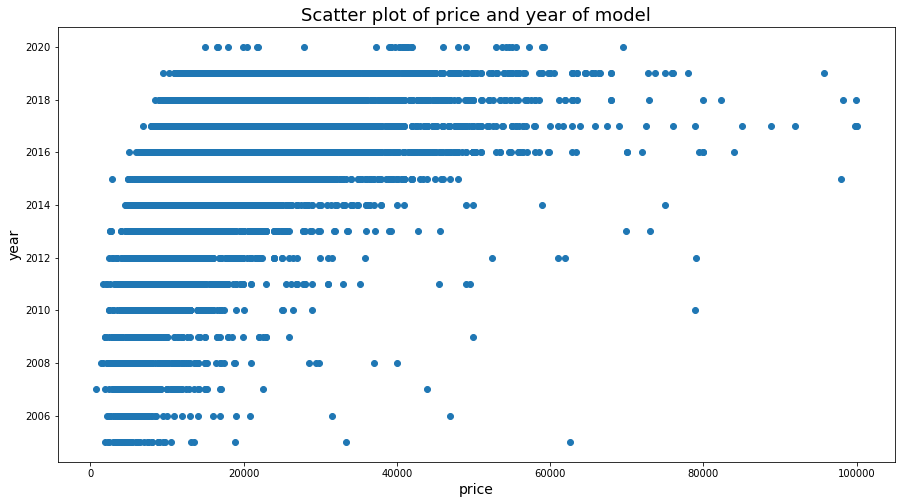

In [10]:
#  here we set the figure size to 15x8
plt.figure(figsize=(15, 8))
plt.scatter(df.price, df.year)
plt.xlabel("price", fontsize=14)
plt.ylabel("year", fontsize=14)
plt.title("Scatter plot of price and year of model",fontsize=18)
plt.show()

From the scatter plot, we can see that newer cars are more likely to have higher values, and as the car gets older the range of car prices becomes smaller. It's also visible in the plot that the points are less for older model years, which means there are less listings for older cars. Meanwhile, we can see that from 2011 to 2020, the lowest price in newer years are always higher than the lowest price in older years. Also, for each year, there will always be a few outliers that have high price even though their year is old.

## Scatter Plot of Price vs. Mileage for each model

Let's then look at the scatter plot of plot and used car price.

In [0]:
#  here we set the figure size to 15x8
plt.figure(figsize=(15, 8))
plt.scatter(df.price, df.mileage)
plt.xlabel("price", fontsize=14)
plt.ylabel("mileage", fontsize=14)
plt.title("Scatter plot of price and mileage of model",fontsize=18)
plt.show()

As shown from the graph above, the higher the mileage, the lower the price of a vehicle.

The graph clearly indicates that the relationship between mileage and price is negative correlation. However, it is not linear whihc can be seen clearly from the graph. This indicates that we need to consider more features rather than just a single feature.

## Price Distribution for Each Make

The graph below shows the price distribution of each make.

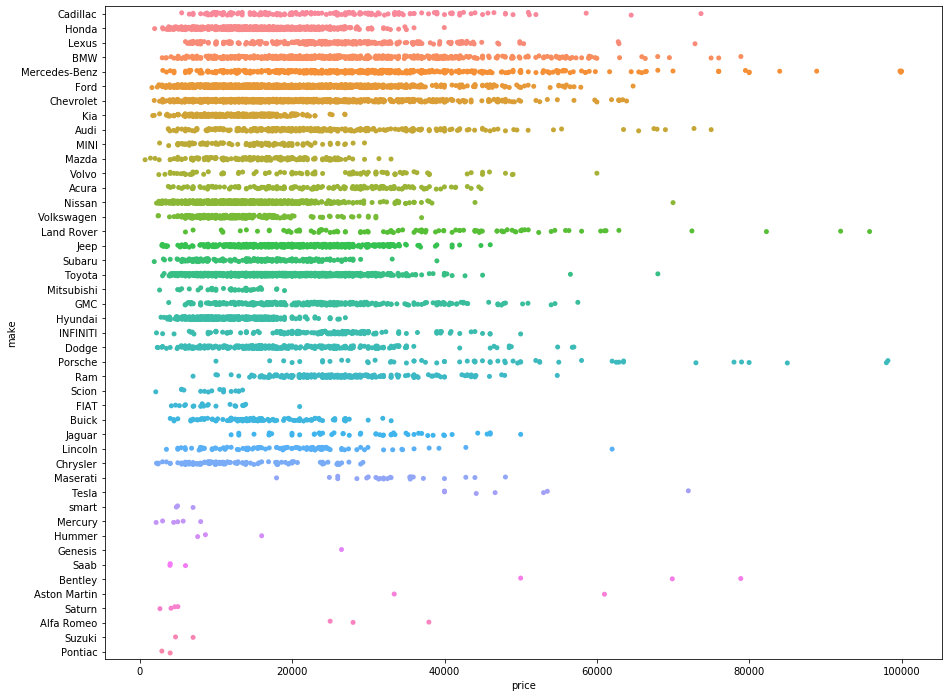

In [23]:
f, ax = plt.subplots(figsize=(15, 12))
sns.stripplot(data = df, x='price', y='make', jitter=.1)
plt.show()

From the graph, we can see that BMW, Ford, Chevrolet and Mercedes-Benz have the widest price distribution. Meanwhile, Suzuki, Pontiac etc. have the narrowest price distribution. This suggests that some luxurious brands, big brands generally have wider price range because they have more customers, who are more diverse. Small brands or some luxurious brands such as Aston Martin have narrower price range because they do not have enough productivity to produce more cars.

## Distribution of Mileages per Year for all models

The graph below shows the distribution of mileages per year for all models.

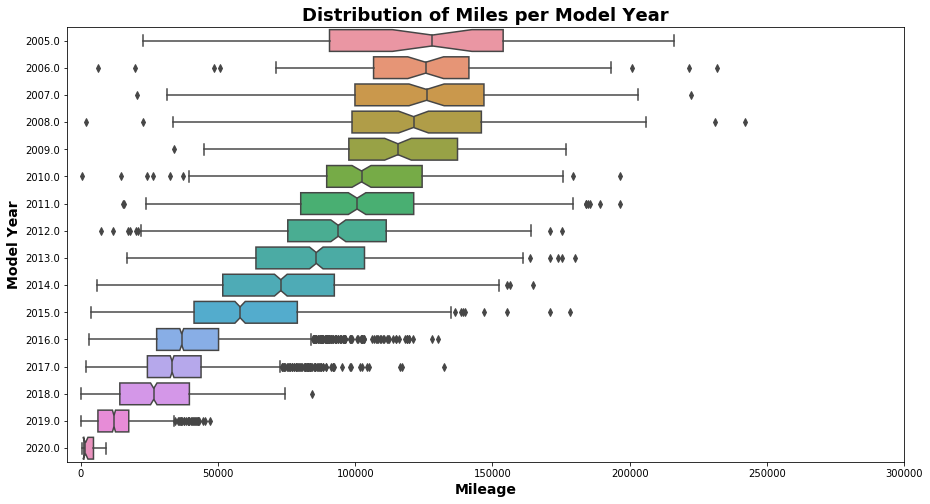

In [24]:
# look at miles by year boxplot
fig = plt.figure(figsize=(15,8))
ax = fig.gca()
sns.boxplot(x='mileage',y='year',data=df,notch=True,orient='h')
plt.xlabel('Mileage',fontsize=14,fontweight="bold")
ax.set_yticklabels(sorted(df.year.unique()))
plt.ylabel('Model Year',fontsize=14,fontweight="bold")
plt.title('Distribution of Miles per Model Year',fontsize=18,fontweight="bold")
plt.xlim(-5000,300000)
plt.show()

From the graph, first we can see that the older the vehicles, the more mileages they have. Second, the older the vehicles are, the wider their mileages range get. This is consistent with the intution that cars got used more when they were owned for a longer period of time compared with newer cars.

## Make Frequency
Lastly, we plot the top 20 makes with most cars in our data.

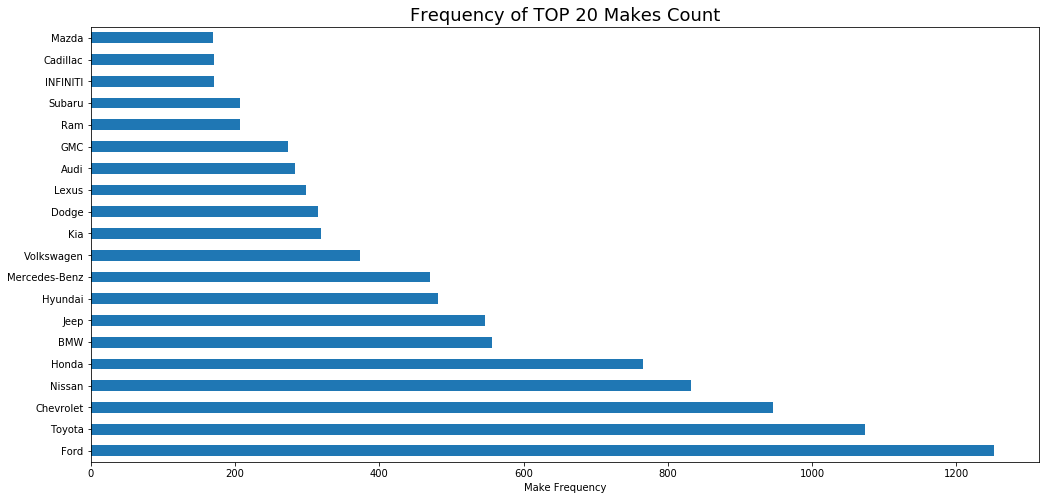

In [25]:
plt.figure(figsize=(17,8))
df.make.value_counts().nlargest(20).plot(kind='barh')
plt.xlabel('Make Frequency')
plt.title("Frequency of TOP 20 Makes Count",fontsize=18)
plt.show()

The results are not surprising at all. From the graph, we can see that Ford, Toyota, Chevrolet have the top three most listed cars for sale on Cargurus.com. The results is consistent with real life as these three brands are among the most popular brands in the U.S.

# <center>Section 4: Predicting Vehicle Price
In this section, the focus will be on developing one model that can precisely predict the vehicle price based on selected features in the data set. There are several regression models that we can use. Therefore, we will be trying several popular regression models and analyzing the results and find the best one that can predict vehicle price.

## Geting Y and X
When fitting a model, it is required to choose X columns and Y columns. In this tutorial, X feature column consists of:
Mileage, hasVehicleHistoryReport, hasThirdPartyVehicleDamageData, accidentCount, ownerCount, hasVehicleHistory, make, model, year, trim, bodyStyle. Y feature column will be Price.

In [12]:
y = df_num['price'].values
X = df_num.drop(['id', 'price'], axis=1)

## Use GridSearch to find best params, use cross_validate to find the get the fit score for each model.

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate, cross_val_predict, cross_val_score

## Feature Ranking
Random forest is a common technique used for the purpose of feature selection of a data set. This is because random forest can provide insights of how well a feature can improve the purity of the node, which means decreasing in impurity over all trees. 

We use random forest to analyze the importance of each feature's influence on the final car price. Output are shown below.

In [14]:
from sklearn.metrics import r2_score
!pip install eli5
import eli5
from sklearn.model_selection import train_test_split
from eli5.sklearn import PermutationImportance
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
rf = RandomForestRegressor(n_estimators = 100,
                           n_jobs = -1,
                           oob_score = True,
                           bootstrap = True,
                           random_state = 42)
rf.fit(X_train, y_train)

perm = PermutationImportance(rf, cv = None, refit = False, n_iter = 50).fit(X_train, y_train)
importances = perm.feature_importances_
for i in range(len(importances)):
  print(X.columns[i]+" has importance of: " + str(importances[i]))


mileage has importance of: 0.6037167404998904
accidentCount has importance of: 0.004556158780005062
ownerCount has importance of: 0.006055315991892958
make has importance of: 0.2852435627696329
model has importance of: 0.21645986862092126
year has importance of: 0.17273392599671933
trim has importance of: 0.2020508839355995
bodyStyle has importance of: 0.6398289360333969


We conclude that millage and body style are the two most important features for vehicle price.

## Linear Regression (LR)

We start with the most basic model of linear regression, which is a linear approach to modeling the relationship between a dependent variable and one or more ndependent variables.

In the code below, we use linear_model from Sklearn.

In [15]:
name = []
mse = []
r2l = []

def mean(l):
  s = 0
  for i in l:
    s += i
  return s/len(l)

In [16]:
from sklearn.linear_model import LinearRegression
# from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

reg = LinearRegression()
scores = cross_validate(reg, X, y, cv=5, scoring = ['r2', 'neg_mean_squared_error'])
mse_mean = mean(-scores['test_neg_mean_squared_error'])
r2_mean = mean(scores['test_r2'])
name.append('Linear Regression')
mse.append(mse_mean)
r2l.append(r2_mean)
print("Mean MSE: ", mse_mean)
print('Mean r^2: ', r2_mean)

Mean MSE:  80981530.13966766
Mean r^2:  0.33477727850981653


From the cross validation we can see that $r^2$ is very low. We conclude that simple linear regression is not a good fit for the data.

### Other Linear Models

Ridge regression and Lasso are close to simple linear regression, and are used to imporve the accuracy of linear regression.

In [32]:
from sklearn.linear_model import Ridge
ridge = Ridge()
scores = cross_validate(ridge, X, y, cv=5, scoring = ['r2', 'neg_mean_squared_error'])
mse_mean = mean(-scores['test_neg_mean_squared_error'])
r2_mean = mean(scores['test_r2'])
name.append('Ridge')
mse.append(mse_mean)
r2l.append(r2_mean)
print("Mean MSE: ", mse_mean)
print('Mean r^2: ', r2_mean)

Mean MSE:  80981542.61905566
Mean r^2:  0.3347771713316819


In [33]:
from sklearn import linear_model
clf = linear_model.Lasso()
scores = cross_validate(clf, X, y, cv=5, scoring = ['r2', 'neg_mean_squared_error'])
mse_mean = mean(-scores['test_neg_mean_squared_error'])
r2_mean = mean(scores['test_r2'])
name.append('Lasso')
mse.append(mse_mean)
r2l.append(r2_mean)
print("Mean MSE: ", mse_mean)
print('Mean r^2: ', r2_mean)

Mean MSE:  80981803.77162261
Mean r^2:  0.3347749438848327


However, from the cross validate score, we see that both $r^2$ are still low, meaning that the relationship between variables and car price may not be well represented by linear models.

Thus, linear models may not be a good fit for the dataset, we need to try other type of models.

##  K-nearest neighbors (KNN)
The k-nearest neighbors ([KNN](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)) algorithm is a simple, supervised machine learning algorithm that can be used to solve both classification and regression problems.

For parameter tuning, we use grid search from sklearn and the main parameter here is the number of neighbors.

After finding the best params, we just create the model and get the cross validate score.

The parameter tuning portion are commented as they take relatively long time on slower machines. If users want to try themselves, please uncomment those comment blocks to run the cross validation.


In [34]:
#KNN
from sklearn.neighbors import KNeighborsRegressor

# grid_param = dict(n_neighbors=[i for i in range(2, 100)])
# grid_search = GridSearchCV(KNeighborsRegressor(), grid_param, cv=5, n_jobs=8, scoring="r2")
# grid_search.fit(X, y)
# print(grid_search.best_params_)

knn = KNeighborsRegressor(n_neighbors=93)
#cross validation to get the percentage of correct prediction in each models
scores = cross_validate(knn, X, y, cv=5, scoring = ['r2', 'neg_mean_squared_error'])
mse_mean = mean(-scores['test_neg_mean_squared_error'])
r2_mean = mean(scores['test_r2'])
name.append('KNN')
mse.append(mse_mean)
r2l.append(r2_mean)
print("Mean MSE: ", mse_mean)
print('Mean r^2: ', r2_mean)

Mean MSE:  81821143.51661304
Mean r^2:  0.32795443900519017


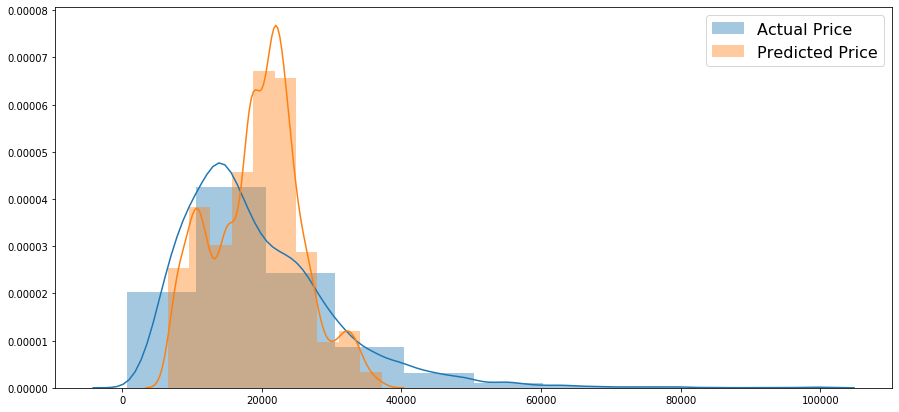

In [35]:
plt.figure(figsize=(15,7))
knn = KNeighborsRegressor(n_neighbors=93)
predicted = cross_val_predict(knn, X, y, cv=5)
sns.distplot(y, bins=10, label='Actual Price')
sns.distplot(predicted, bins=10, label='Predicted Price')
plt.legend(loc='upper right',fontsize=16)
plt.show()

The KNN regressor does not perform very well here. As the the $r^2$ is only around 0.3 for the cross validation. The reason might be because since there are so many different type of cars, the points are very sparse from each other, making KNN not ideal for the situation.

## Random Forest Regressor (RF)

A [random forest regressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. 

In [36]:
from sklearn.ensemble import RandomForestRegressor

# grid_param = dict(n_estimators=[i for i in range(10, 101)])
# grid_search = GridSearchCV(RandomForestRegressor(random_state=1), grid_param, cv=5, n_jobs=8, scoring="r2")
# grid_search.fit(X, y)
# print(grid_search.best_params_)

rf = RandomForestRegressor(random_state=1, n_estimators=81)
scores = cross_validate(rf, X, y, cv=5, scoring = ['r2', 'neg_mean_squared_error'])
mse_mean = mean(-scores['test_neg_mean_squared_error'])
r2_mean = mean(scores['test_r2'])
name.append('Random Forest')
mse.append(mse_mean)
r2l.append(r2_mean)
print("Mean MSE: ", mse_mean)
print('Mean r^2: ', r2_mean)

Mean MSE:  17716126.22374711
Mean r^2:  0.8542903348213045


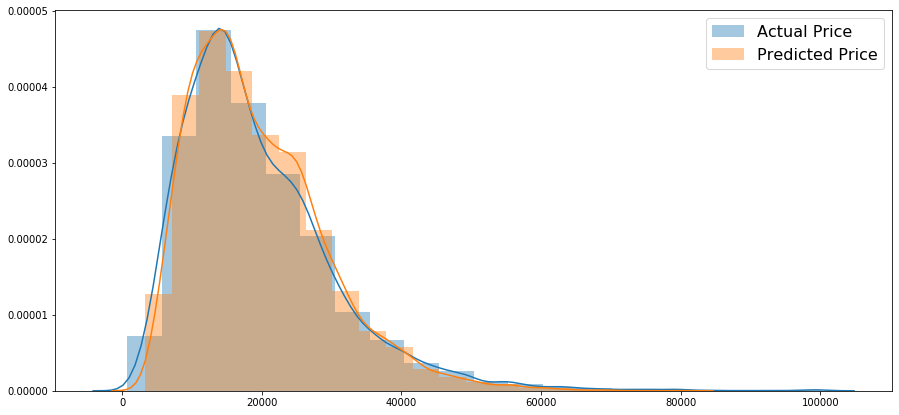

In [37]:
plt.figure(figsize=(15,7))
rf = RandomForestRegressor(random_state=1, n_estimators=81)
predicted = cross_val_predict(rf, X, y, cv=5)
sns.distplot(y, bins=20, label='Actual Price')
sns.distplot(predicted, bins=20, label='Predicted Price')
plt.legend(loc='upper right',fontsize=16)
plt.show()

From the $r^2$ as well as the graph, we can see that overall the random forest model performs very well. The $r^2$ is above 0.8 for all folds.

## Gradient Boosting Regressor (GB)

[Gradient boosting (GB)](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html) is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees. 

GB builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions. In each stage a regression tree is fit on the negative gradient of the given loss function.

In [38]:
from sklearn.ensemble import GradientBoostingRegressor

scores = cross_validate(GradientBoostingRegressor(learning_rate=0.25, max_depth=5.0, n_estimators=200), X, y, cv=5, scoring = ['r2', 'neg_mean_squared_error'])
mse_mean = mean(-scores['test_neg_mean_squared_error'])
r2_mean = mean(scores['test_r2'])
name.append('Gradient Boosting')
mse.append(mse_mean)
r2l.append(r2_mean)
print("Mean MSE: ", mse_mean)
print('Mean r^2: ', r2_mean)

Mean MSE:  10911449.307951268
Mean r^2:  0.9102860646031701


In [40]:
scores = cross_val_score(GradientBoostingRegressor(learning_rate=0.25, max_depth=5.0, n_estimators=200), X, y, cv=5,scoring = 'neg_mean_squared_error')
print("Mean error:", np.sqrt(-scores.mean()))

Mean error: 3311.481806870327


This means we are able to predict the price with in 3300 dollars on average.

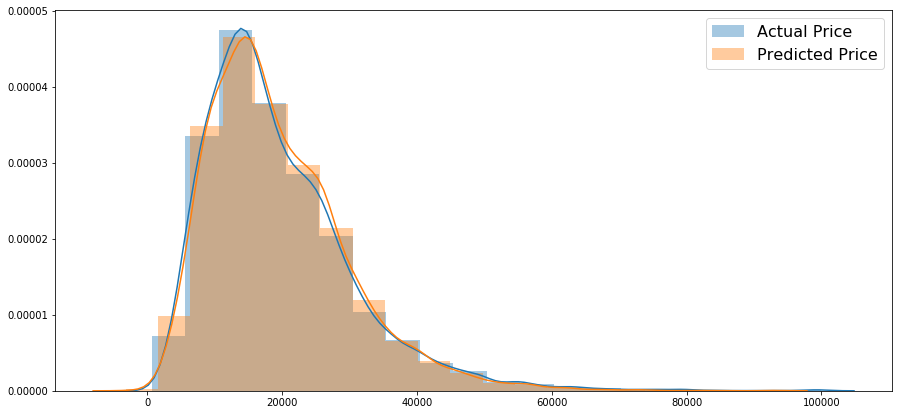

In [41]:
plt.figure(figsize=(15,7))
gb = GradientBoostingRegressor(learning_rate=0.25, max_depth=5.0, n_estimators=200)
predicted = cross_val_predict(gb, X, y, cv=5)
sns.distplot(y, bins=20, label='Actual Price')
sns.distplot(predicted, bins=20, label='Predicted Price')
plt.legend(loc='upper right',fontsize=16)
plt.show()

From the grpah, we can see that the predicted prices match actual prices very well. 

## Neural Network (NN)
We use Keras from Tensorflow to build a neural network and write a $r^2$ function to monitor the model. We normalize the data to prevent the negative impact of outliers and provide a early stop when the model tends to overfit the data. The pai We enable GPU to train the model in order to save the time, please set the proper number of CPU and GPU based on the running machine, or remove the section if needed.

In [42]:
## Neural Network
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

## Enable GPU
config = tf.ConfigProto( device_count = {'GPU': 1 , 'CPU': 4} ) 
sess = tf.Session(config=config) 
keras.backend.set_session(sess)

## Set up R2 as metrics
from tensorflow.keras import backend as K

def r2(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred )) 
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) ) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Normalization
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)
X_train -= mean
X_train /= std

X_test -= mean
X_test /= std

## Build neural network

def build_model():
  model = keras.Sequential()
  model.add(keras.layers.Dense(64, activation='relu', input_shape=(8,)))
  model.add(keras.layers.Dense(64, activation='relu'))
  model.add(keras.layers.Dense(64, activation='relu'))
  model.add(keras.layers.Dense(64, activation='relu'))
  model.add(keras.layers.Dense(64, activation='relu'))
  model.add(keras.layers.Dense(64, activation='relu'))
  model.add(keras.layers.Dense(64, activation='relu'))
  model.add(keras.layers.Dense(1))
  ## Loss function and optimization
  model.compile(optimizer='adam', loss='mean_squared_error', metrics=[r2])
  return model

# Set callback functions to early stop training and prevent overfitting
callbacks = [EarlyStopping(monitor='loss', patience=3),
         ModelCheckpoint(filepath='best_model.h5', monitor='loss', save_best_only=True)]

## Training the final model
model = build_model()
print(model.summary())

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                576       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 64)                4160      
_________________________________________

In [43]:
## Trainning
history = model.fit(X_train, 
                  y_train, 
                  epochs=1000, 
                  callbacks=callbacks, 
                  verbose=0, 
                  batch_size=120, 
                  validation_data=(X_test, y_test)) 
test_mse_score, test_mae_score = model.evaluate(X_test, y_test)

# y_predict 
y_predict = model.predict(X_test)

name.append('Neural Network')
mse.append(test_mse_score)
r2l.append(test_mae_score)

2686/2686 [==============================] - 0s 29us/sample - loss: 47186363.2018 - r2: 0.6377


The $r^2$ score of neural network model is slightly lower than random forest but has a overall good performance in this dataset.

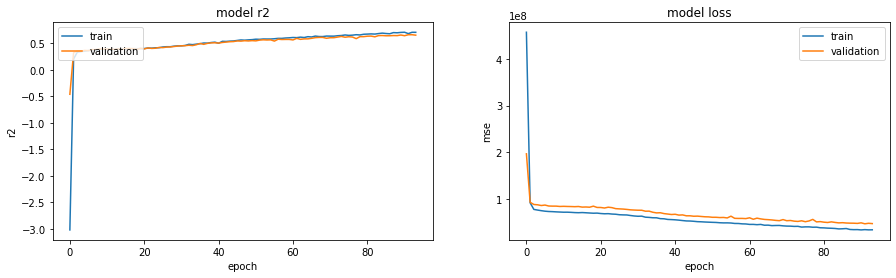

In [44]:
figure, (ax1, ax2) = plt.subplots(1, 2, sharey=False, figsize = (15,4))

# Plot the model accuracy in the training history
ax1.plot(history.history['r2'])
ax1.plot(history.history['val_r2'])
ax1.set_title('model r2')
ax1.set_ylabel('r2')
ax1.set_xlabel('epoch')
ax1.legend(['train', 'validation'], loc='upper left')

#Plot the model accuracy in the training history
ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_title('model loss')
ax2.set_ylabel('mse')
ax2.set_xlabel('epoch')
ax2.legend(['train', 'validation'], loc='upper right')

From the graph, we can see the model has a very high accuracy, it is nearly identical to the validation and the overfitting does not happen.

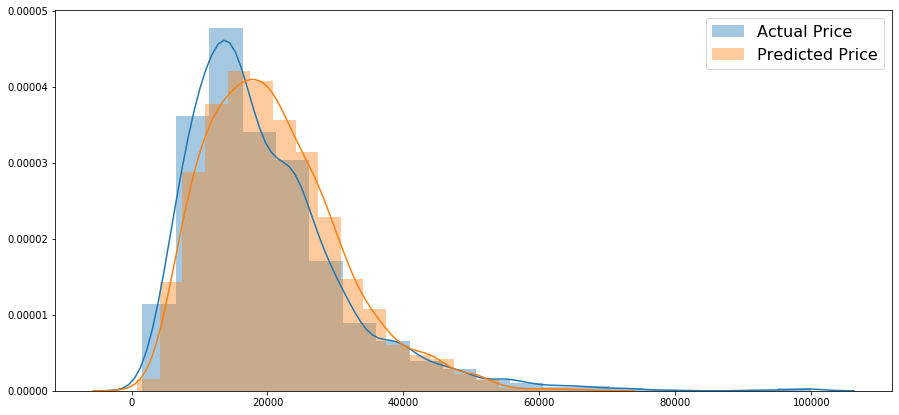

In [45]:
plt.figure(figsize=(15,7))
sns.distplot(y_test, bins=20, label='Actual Price')
sns.distplot(y_predict, bins=20, label='Predicted Price')
plt.legend(loc='upper right',fontsize=16)
plt.show()

This graph shows the price predicted by neural network has the similar distribution as the actual data.

## Compare Model Performance
From the result below, we can see that gradient bootsing (GB) has the highest r square score and the lowest mean square error. Meanwhile, linear regression, Ridge, Lasso and KNN all have low r square score and high mean square error. Therefore, we conclude that Gradient Boosting is the best model to fit our regression task, i.e. it can do a good job on predicting vehicle price.

Linear Regression
MSE: 80981530.13966762 r2: 0.33477727850981676
Ridge
MSE: 80981542.61905566 r2: 0.3347771713316819
Lasso
MSE: 80981803.77162261 r2: 0.3347749438848327
KNN
MSE: 81821143.51661304 r2: 0.32795443900519017
Random Forest
MSE: 17716126.22374711 r2: 0.8542903348213045
Gradient Boosting
MSE: 10911449.307951268 r2: 0.9102860646031701
Neural Network
MSE: 47186363.20178705 r2: 0.6377288


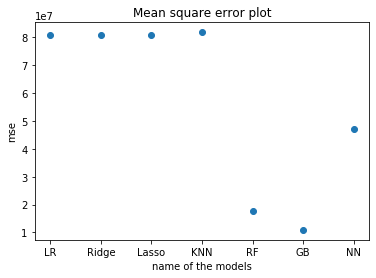

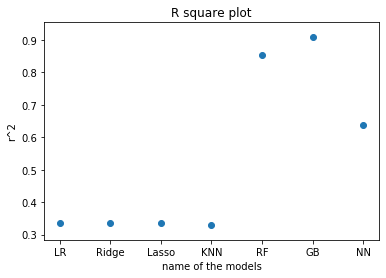

In [53]:
for i in range(len(name)):
  print(name[i] + "\nMSE: " + str(mse[i]) + " r2: " + str(r2l[i]))

name2 = ['LR', 'Ridge', 'Lasso', 'KNN', 'RF', 'GB', 'NN']
plt.scatter(name2, mse)
plt.title("Mean square error plot")
plt.xlabel("name of the models")
plt.ylabel("mse")
plt.show()

plt.scatter(name2, r2l)
plt.title("R square plot")
plt.xlabel("name of the models")
plt.ylabel("r^2")
plt.show()

# <center> Section 5: Conclusion and Further Exploration
Even though CarGurus is a popular website that many people use for their auto-shopping. You can rarely find a usable dataset that includes detailed vehicles information online, not to mention that the dataset happens to contain vehicle information around College Park. In other words, our dataset in this tutorial is unique and specifically more relevant to students of University of Maryland because it contains the latest data and all of the vehicle information are collected from surrounding area of College Park. In this tutorial, we were able to collect data from the website, perform analysis on the dataset, and train our model to achieve a relatively high accuracy with high $r^2$. These models can be used by both customers and dealers to evaluate whether the price is reasonable for a used car. Hopefully, this tutorial could benefit our students and help them find a decent used car deal. Even if you’re not interested in this dataset, many of the techniques that are used in this tutorial can still be applied to your data science projects since all data science projects need to collect data, clean data, tidy datasets, analyze datasets and run machine learning model on your datasets.

If you are interested in CarGurus and used vehicle data analysis, there is much more data left for you to explore and try new ideas. We only analyzed the vehicles around College Park area, similar analysis could be performed on state level, or even nation level. In other words, you could use the techniques from this tutorial to predict a used car price based on the state that it is in. In addition, you might be interested in the effect of geographical location on used car price, which might play a factor in vehicle price. But we chose to focus only on vehicles around College Park. This tutorial was an attempt to use the amazing and incredible data science techniques and analysis skills to solve a real-world problem and we hope that it was worth your time!

# <center> Section 6. Reference
CarGurus (2019). <em>2019 Buyer Insight Report</em>. Retrieved from "https://dealers.cargurus.com/rs/611-AVR-738/images/CarGurus-2019-Buyer-Insight-Report.pdf".

Clark Howard CNN Show CNN (2011) <em>"The Right Price On Used Cars".</em> Retrieved from "cnn.com".
